In [1]:
import pandas as pd
import plotly.express as px


df = pd.read_csv('medicare-spending.csv')

# Ensure the 'year' column is of integer type
df['year'] = df['year'].astype(int)

# List of years to iterate through
years = df['year'].unique()

# Generate choropleth maps for each year
for year in years:
    df_year = df[df['year'] == year]

    fig = px.choropleth(df_year, 
                        locations='provider_state', 
                        locationmode="USA-states", 
                        color='avg_medicare_payments',
                        scope="usa",
                        title=f'Average Medicare Payments by State in {year}',
                        color_continuous_scale='RdBu',  # Change the color scale to RdBu
                        labels={'avg_medicare_payments': 'Average Medicare Payments', 'provider_state': 'State'})

    # Update color bar label
    fig.update_layout(coloraxis_colorbar=dict(title='Average Medicare Payments'))

    # Update layout for better presentation
    fig.update_layout(
        title_text=f'Average Medicare Payments by State in {year}',
        geo=dict(
            lakecolor='rgb(255, 255, 255)',
            projection_type='albers usa'
        )
    )

    # Show the figure
    fig.show()


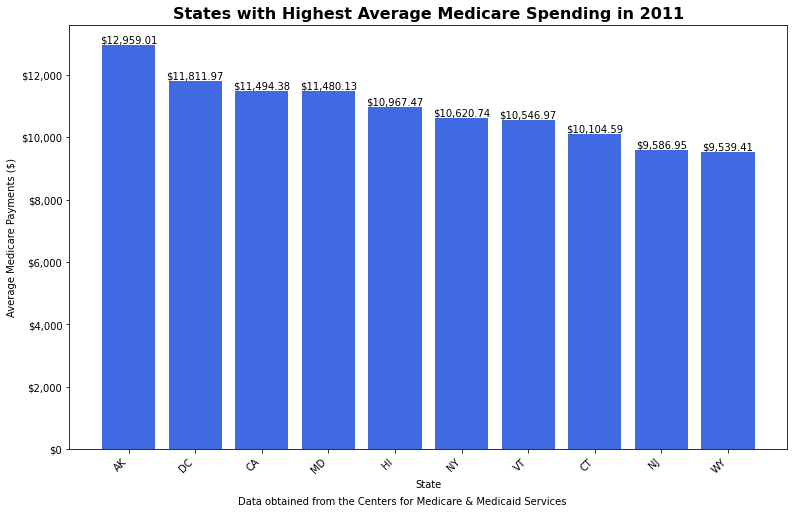

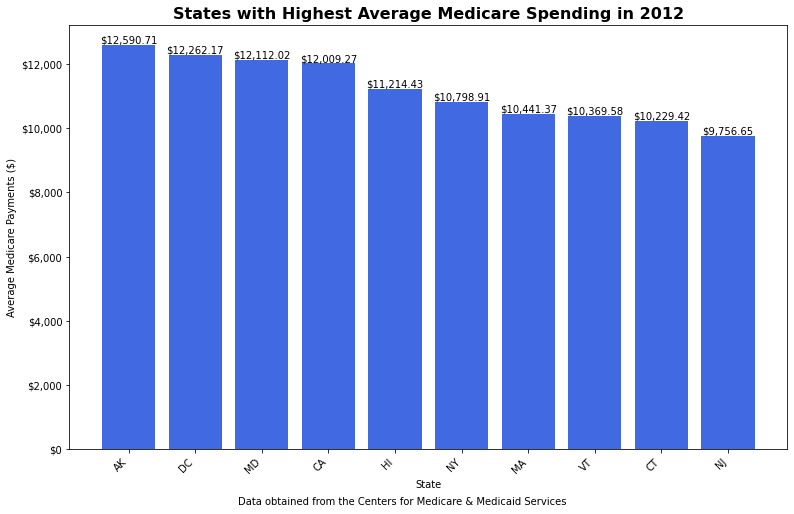

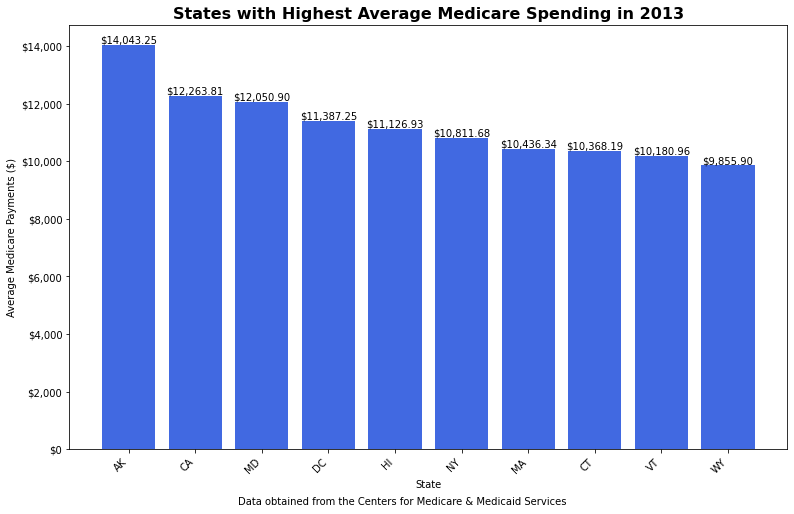

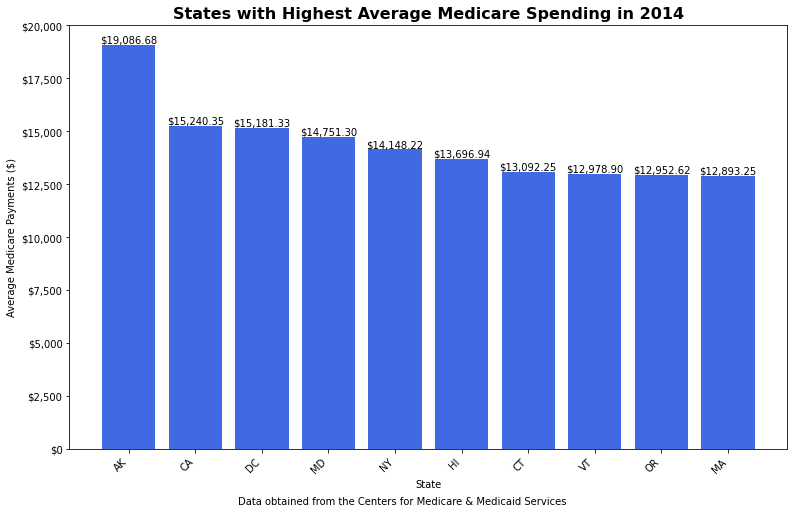

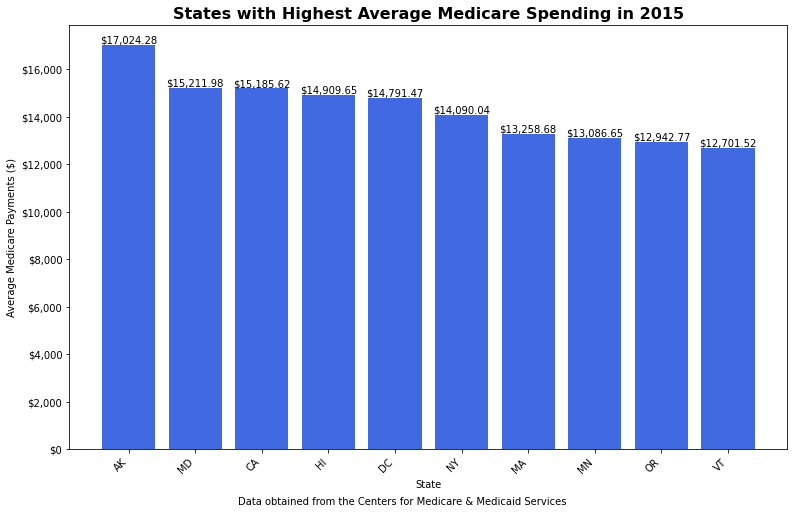

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Load the data
df = pd.read_csv('medicare-spending.csv')

# Ensure the 'year' column is of integer type
df['year'] = df['year'].astype(int)

# List of years to iterate through
years = df['year'].unique()

# Function to create bar graphs
def create_bar_graphs(data, year, title, color):
    plt.figure(figsize=(11, 7))
    bars = plt.bar(data['provider_state'], data['avg_medicare_payments'], color=color)
    plt.xlabel('State')
    plt.ylabel('Average Medicare Payments ($)')
    plt.title(title, fontweight='bold', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Format y-axis with dollar sign
    ax = plt.gca()
    ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.0f}'))

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:,.2f}', ha='center', va='bottom')

    # Add footnote
    plt.figtext(0.5, -0.01, 'Data obtained from the Centers for Medicare & Medicaid Services', wrap=True, horizontalalignment='center', fontsize=10)

    plt.show()

# Generate bar graphs for each year
for year in years:
    df_year = df[df['year'] == year]
    
    # Find the states that spend the most
    highest_spending = df_year.nlargest(10, 'avg_medicare_payments')
    
    # Create bar graphs for highest spending states
    create_bar_graphs(highest_spending, year, f'States with Highest Average Medicare Spending in {year}', 'royalblue')


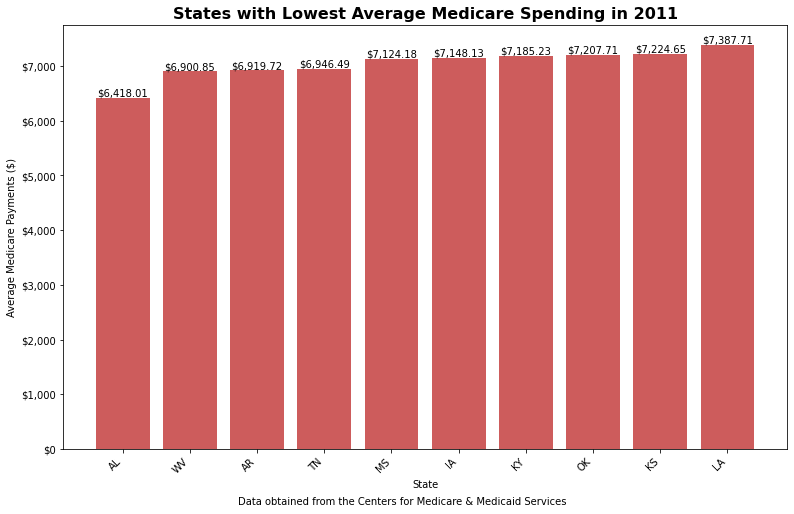

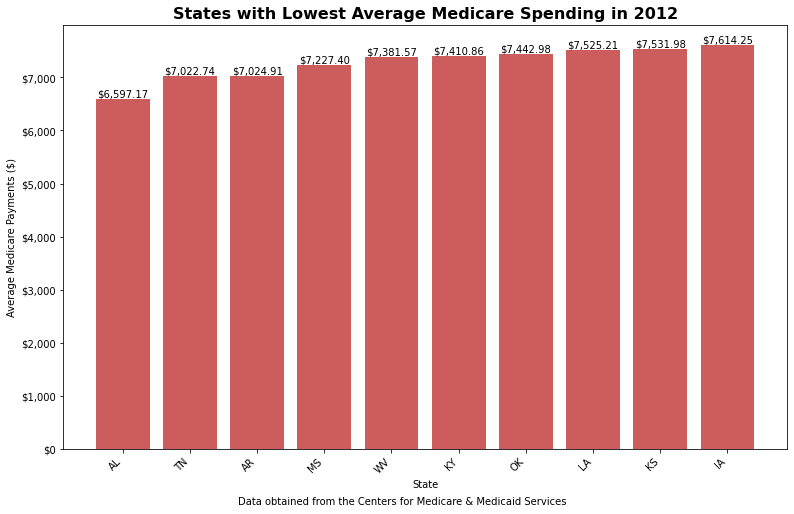

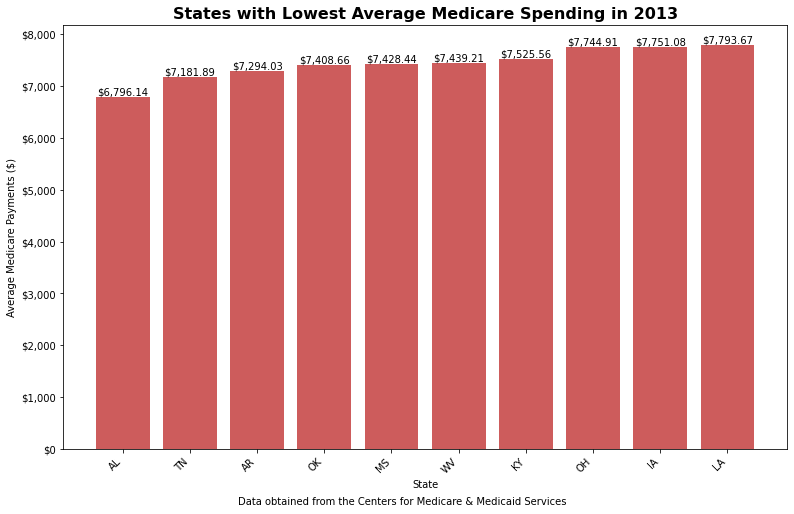

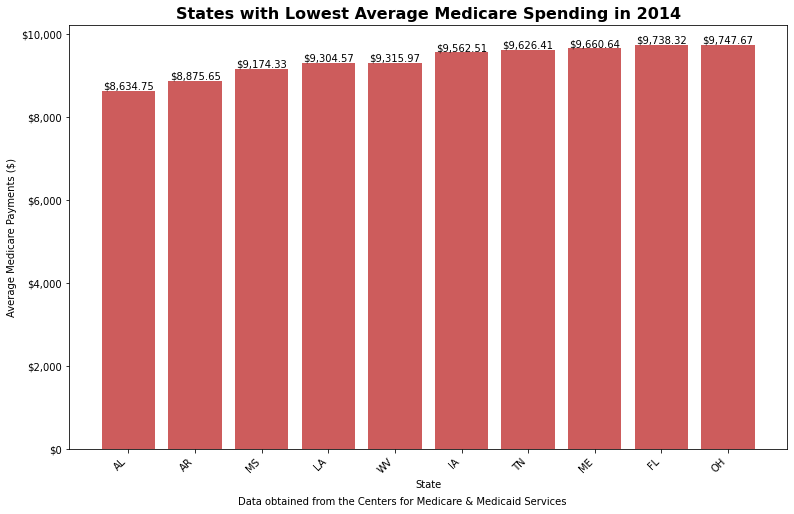

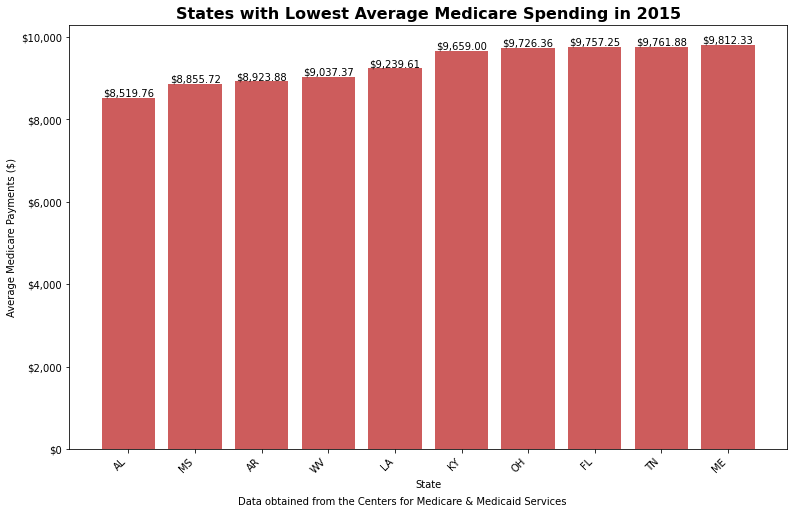

In [3]:
for year in years:
    df_year = df[df['year'] == year]

    # Find the states that spend the least
    lowest_spending = df_year.nsmallest(10, 'avg_medicare_payments')
    # Create bar graphs for lowest spending states
    create_bar_graphs(lowest_spending, year, f'States with Lowest Average Medicare Spending in {year}', 'indianred')